In [13]:
# Imports as always.
import os
import re
import matplotlib.pyplot as plt

import torch

import torchvision
from torchvision import transforms

from PIL import Image, ImageOps

# Ignore warnings.
import warnings

warnings.filterwarnings('ignore')

In [2]:
print(f'CUDA is available for use with PyTorch: {torch.cuda.is_available()}')

CUDA is available for use with PyTorch: True


In [3]:
import sys

print(f'Installed Python version:  {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')
print(f'Installed PyTorch version: {torch.__version__}')

Installed Python version:  3.8.18
Installed PyTorch version: 2.1.2+cu121


# Damaging Images

This notebook develops our methods for damaging images, with a number of different methods simulating different forms of damage that may be encountered in real applications (particularly in medical imaging).

These methods are as follows:
- **Corruption (random)**: Randomly selecting pixels to be zeroed, which simulates the corruption of individuals pixels over a random distribution.
- **Corruption (patchy)**: Randomly selecting regions ("patches") to be zeroed, which simulates a more structured corruption of data, though still over a random distribution.
- **Noise (random)**: Similar to corruption (random), but introducing random noise rather than zeroing.
- **Noise (aggregated)**: Likewise, but a pixel's noise is sampled from its immediate neighbourhood (e.g. aggregate pixel value in the local region) to simulate confounding noise.
- **Gaussian blur**: Applying a Gaussian blur across the image to simulate a wide-spread muting of information (i.e. not a complete loss, but a loss of resolution at least).
- ...

Each method is to be parameterised by the `damage_degree`, which exists as a value in $(0,1)$ describing how much damage the image has been exposed to. It will have different interpretations under different methods (e.g. in random corruption it describes the proportion of pixels exposed to corruption, in Gaussian blur it controls the spread of information over the image, etc.).

In [8]:
# Pre-define a couple of transform functions to and from tensors and images.
tensor_to_image = transforms.ToPILImage()
image_to_tensor = transforms.ToTensor()

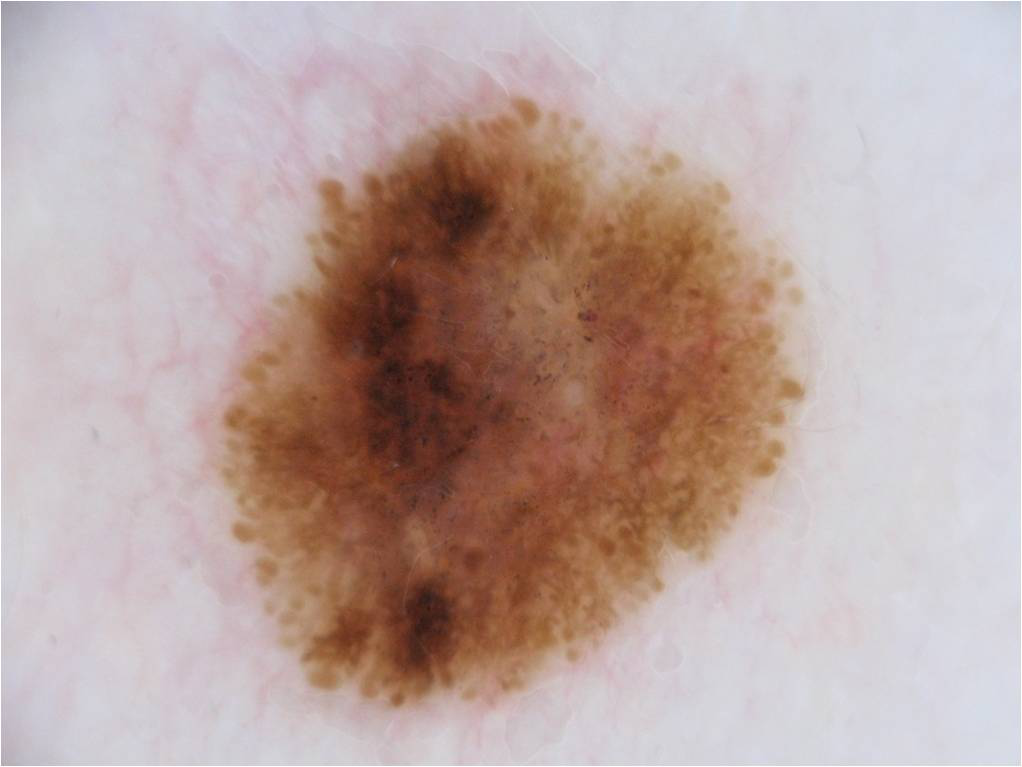

In [34]:
# This is the path to an example image to demonstrate the damage method -- change as you see fit.
example_directory = './data/ISIC2018/ISIC2018_Task1-2_Training_Input/ISIC_0000008.jpg'

# Read in the example image.
example_image = Image.open(example_directory)

# Let's have a look at the perfect image.
example_image.show()

## Corruption (Random)

This method involves randomly sampling pixels in the image to be 'corrupted'. Corruption amounts to zeroing the value -- the data is entirely lost.

We take no mitigating steps here, since this is something we expect the model to learn automatically or otherwise. So, while it may be advisable to fill corrupted pixels with some aggregation of their neighbour's values, we will not take such an approach (though, exactly this is considered as "aggregated noise" damage later).

Here, `damage_degree` translates to the percentage of pixels in the image that are to be corrupted. This is deterministic -- once a pixel is selected for corruption, it *is* corrupted. We may consider a stochastic corruption method in the future to reduce predictability (in that the model is theoretically able to anticipate how much damage any given image will have), but we will not in this method.

In [ ]:
def random_corruption(image, damage_degree):
    